# Mini-Project 4

Welcome to your fourth Mini Project! You will build an RNN model to classify text and an LSTM model for anomaly detection (also outlier detection) on the temperature sensor data. **Please complete your assignment in this Jupyter Notebook.**

---

**Requirements**: 
- TensorFlow 2.x is allowed to implement your models.
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.

## Task 1: Text Classification

This task aims to train a sentiment analysis model to classify given sentences as **positive or negative**, based on the Recurrent Neural Network.

---

**Tasks**

1. Load data
    - Load the training data and the test data.
    - Extract labels and texts which are seperated by the string of `" +++$+++ "`.
    - Eliminate index information in the test data so that you can get pure sentences.
    - Print out the first 10 examples of your training set and test set.
2. Preprocess data
    - Tokenize the data and convert the text to sequences.
    - Add padding to ensure that all the sequences have the same shape.
    - **Hint**: click [here](https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html) for more information.
3. Build RNN model
    - Build a RNN based on TensorFlow 2.x.
    - Visualize the model using [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).
4. Train model
    - Initialize hyperparameters.
    - Train your model.
    - Visualize the performance including training loss, training accuracy, validation loss, and validation accuracy.
5. Predict
    - Test your model on the test data.
    - Save the predicted results (labels and texts) in a CSV file and submit it to Canvas.


In [1]:
import numpy as np

def load_data(train_file_path, test_file_path):
    
    """
        Loads the dataset, from the given file path.
        
        Parameters
        ----------
        train_file_path: string
            Path of the train text file.
        test_file_path: string
            Path of the test text file.
            
        Return
        ----------
        train_data: list
            Output of training sentences.
        test_data: list
            Output of test sentences.
        labels: ndarray
            Output of training labels.
    """
    
    # Empty lists to store training, test and label data
    train_data = [] 
    test_data = [] 
    labels = [] 
    
    # Opening the text file of training and test set
    train_file = open(train_file_path, "r", encoding='utf-8') 
    test_file = open(test_file_path, "r", encoding='utf-8') 
    
    # Reading lines while ignoring header for test data
    train_lines = train_file.readlines() 
    test_lines = test_file.readlines()[1:]
    
    # Loop to iterate and store the training sentences and labels
    for line in train_lines: 
        train_data.append(line.split(' +++$+++ ')[1])
        labels.append(line[:1])
    
    # Loop to iterate and store the test sentences
    for line in test_lines: 
        test_data.append(line.split(',',maxsplit=1)[1])
    
    # Converting list of strings labels to numpy array of integer labels
    y_train = np.array([int(i) for i in labels])
    y_train = np.reshape(y_train, (len(y_train), 1))
    
    return train_data, y_train, test_data

In [2]:
train_data, y_train, test_data = load_data('task1_training_data.txt', 'task1_test_data.txt')

# Printing 10 examples from the training set
print("################ First 10 Examples From The Training Set ################\n")
for i in range(0,10):
    print("{}: {}".format(i+1, train_data[i]))
    
# Printing 10 examples from the test set
print("################ First 10 Examples From The Test Set ################\n")
for i in range(0,10):
    print("{}: {}".format(i+1, test_data[i]))

################ First 10 Examples From The Training Set ################

1: are wtf ... awww thanks !

2: leavingg to wait for kaysie to arrive myspacin itt for now ilmmthek .!

3: i wish i could go and see duffy when she comes to mamaia romania .

4: i know eep ! i can ' t wait for one more day ....

5: so scared and feeling sick . fuck ! hope someone at hr help ... wish it would be wendita or karen .

6: my b day was thurs . i wanted 2 do 5 this weekend for my b day but i guess close enough next weekend . going alone

7: e3 is in the trending topics only just noticed ive been tweeting on my iphone until now

8: where did you get him from i know someone who would love that !

9: dam just got buzzed by another huge fly ! this time it landed on my head ... not impressed

10: tomorrowwwwwwwww !!! you ' ll love tomorrow ' s news !

################ First 10 Examples From The Test Set ################

1: my dog ate our dinner . no , seriously ... he ate it .

2: omg last day sooon n of 

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_data(X_train, X_test):
    
    """
        Tokenizes the data and converts it to padded training sequences.
        
        Parameters
        ----------
        X_train: list
            Input of training dataset 
        X_test: list
            Input of test dataset
            
        Return
        ----------
        X_train: ndarray
            Output of tokenized training data converted to padded training sequences.
        X_test: ndarray
            Output of tokenized test data converted to padded training sequences.
    """
    
    # Defining hyperparameters for performing tokenization 
    features = 20000
    oov_token = '<UNK>'
    pad_type = 'post'
    trunc_type = 'post'
    
    # Tokenizing the training data
    tokenizer_train = Tokenizer(num_words=features, oov_token=oov_token)
    tokenizer_train.fit_on_texts(X_train)
    
    # Tokenize the test data
    tokenizer_test = Tokenizer(num_words=features, oov_token=oov_token)
    tokenizer_test.fit_on_texts(X_test)
    
    # Getting training and test data word index    
    word_index_train = tokenizer_train.word_index
    word_index_test = tokenizer_test.word_index

    # Encoding training and test data sentences into sequences
    train_sequences = tokenizer_train.texts_to_sequences(X_train)
    test_sequences = tokenizer_test.texts_to_sequences(X_test)

    # Taking out max length for truncation
    maxlen = max([len(x) for x in train_sequences])

    # Pad the training sequences
    X_train = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
    X_test = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
    
    return X_train, X_test

In [4]:
X_train, X_test = preprocess_data(train_data, test_data)

In [5]:
from tensorflow.keras import datasets, layers, models

def my_rnn_model(data):
        
    """
        Recurrent neural network model using sequential API.
        
        Parameters
        ----------
        data: ndarray
            Input of training dataset 
           
        Return: An instance of RNN model    
    """
    
    model = tf.keras.Sequential([
      layers.Embedding(20000,5),
      layers.Dropout(0.4),
      layers.GlobalAveragePooling1D(),
      layers.Dropout(0.4),
      layers.Dense(32, activation='relu'),
      layers.Dense(1, activation='sigmoid')])

    return model

In [6]:
model = my_rnn_model(X_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 5)           100000    
_________________________________________________________________
dropout (Dropout)            (None, None, 5)           0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 5)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 100,225
Trainable params: 100,225
Non-trainable params: 0
__________________________________________________

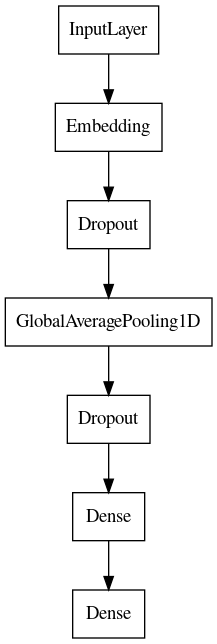

In [7]:
# Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Visualizing the model summary
model.summary()

# Visualizing the model structure 
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96,
)

In [8]:
from sklearn.model_selection import train_test_split

# Model training and validation
history = model.fit(X_train, y_train, epochs=10, validation_split=0.25, batch_size=100, verbose=1)                                             

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6451 - accuracy: 0.6132 - val_loss: 0.4962 - val_accuracy: 0.7779
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5100 - accuracy: 0.7619 - val_loss: 0.4799 - val_accuracy: 0.7826
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4930 - accuracy: 0.7719 - val_loss: 0.4700 - val_accuracy: 0.7879
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4835 - accuracy: 0.7777 - val_loss: 0.4691 - val_accuracy: 0.7890
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4763 - accuracy: 0.7828 - val_loss: 0.4674 - val_accuracy: 0.7884
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4714 - accuracy: 0.7865 - val_loss: 0.4696 - val_accuracy: 0.7876
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4648 - accuracy: 0.7898 - val_loss: 0.4684 - val_accuracy:

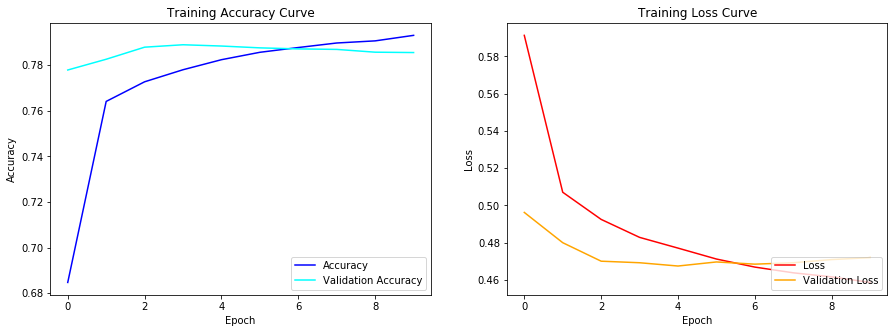

In [9]:
# Visualizing the training accuracy curve
plt.figure(figsize=(15,5))
plt.subplot(1,2,1, title='Training Accuracy Curve')
plt.plot(history.history['accuracy'], label='Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
legend = plt.legend(loc='lower right')

# Visualizing the training loss curve
plt.subplot(1,2,2, title='Training Loss Curve')
plt.plot(history.history['loss'], label='Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
legend = plt.legend(loc='lower right')

In [10]:
# Prediciting labels for test data -> 'POSITIVE' if prediciton is greater than 0.5, otherwise 'NEGATIVE'
prediction = model.predict(X_test)
prediction = np.array(['Positive' if i>0.5 else 'Negative' for i in prediction])

In [11]:
import pandas as pd

# Saving the predicted labels and texts in csv
df = pd.DataFrame({'Test Sentences':test_data, 'Prediction': prediction})
df.to_csv("task1.csv")

## Task 2: Anomaly Detection

In manufacturing industries, the anomaly detection technique is applied to predict the abnormal activities of machines based on the data read from sensors. In machine learning and data mining, anomaly detection is the task of identifying the rare items, events, or observations that are suspicious and seem different from the majority of the data. In this task, you will predict the possible failure of the system based on the temperature data. And this failure can be detected by check if they follow the trend of the majority of the data.

---

**Dataset**

The given dataset (`ambient_temperature_system_failure.csv`) is a part of Numenta Anomaly Benchmark (NAB) dataset, which is a novel benchmark for evaluating machine learning algorithms in anomaly detection.

**Tasks**

Because the labels have not been given, you will need to use a LSTM based model to capture the trend of the feature for majority of the data. First, extract $n_x$ features from each of the raw data point. Second, create a sliding window with length $l$. Third, fomulate LSTM taking a matrix of shape $l \times n_x$ as the input to predict the temperature value of the next time step $l+1$. Last, compare the predicted result and the real data and find out abnormal points where the difference between these two values are larger than the threshold. 

For instance, if we want to extract 3 features ($n_x=3$), and set the sliding window length to 100 ($l=100$). Then LSTM will take the first 100 (e.g., $[0:100]$) time step data as the input to predict the temperature value of the next time step (e.g., 100). The shape of the input will be $100 \times 3$, and shape of the output will be a single number.

1. Load data
    - Read the CSV file.
    - Draw a curve to visualize the time-series data.
2. Preprocess data
    - The raw data of temperature is the degree Fahrenheit, you will need to convert it into degree Celcius.
    - Use Pandas package convert string timestamp data into the datatime data. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for details.
3. Feature Engineering
    - We will use datatime data to generate four features: hours, day or night, day of the week, weekday or weekends.
    - Hour: convert datetime data into hours. The result of your processed data will be [0, 1, 2, ..., 22, 23, 0, 1, ..., 22, 23]. Check [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html).
    - Day or night: this will be a binary data. 7:00-22:00 will be day time, the rest will be night.
    - Day of the week: convert datetime data into day of the week. The result of your processed data will be [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6 ...]. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html) for more information.
    - Workday or weekend: this will be a binary data. Monday to Friday will be workdays, Saturday and Sunday are weekend.
    
4. Prepare training and testing data
    - Split the dataset into training set and test set.
    - Min-max normalization.
    - Generate sliding window (similar to the last task of HW1) data.
3. Build LSTM model
    - Build an LSTM model using TensorFlow 2.x.
    - Visualize your model.
4. Train model
    - Initialize hyperparameters.
    - Train the model.
    - Evaluate the trained model on the test data.
    - Visualize the performance including training loss and test loss.
5. Find anomalies
    - Specify the threshold and predict anomalies on testing dataset.
    - Visualize the anomalies.


In [12]:
# Write your code here
from tensorflow.keras import datasets, layers, models
from sklearn import preprocessing
from tensorflow import keras
import pandas as pd
import numpy as np

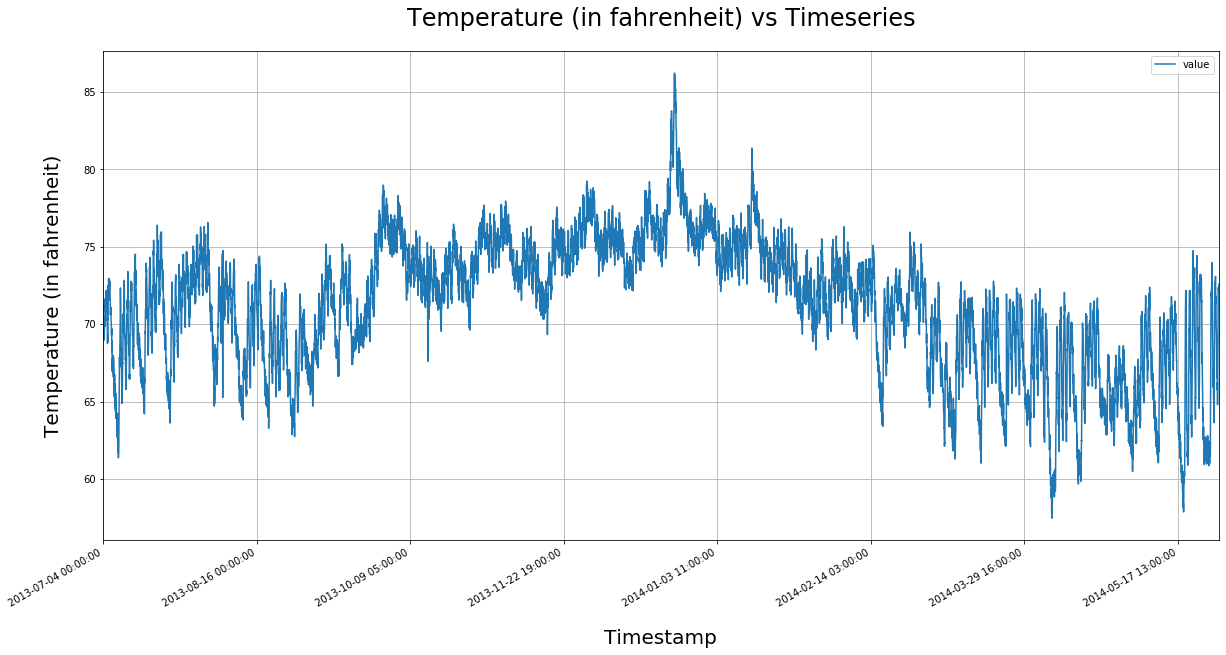

In [13]:
"""------------ LOADING DATA ------------"""

# Reading the csv file
df = pd.read_csv('ambient_temperature_system_failure.csv')

# Visualizing time-series data
df.plot('timestamp','value', figsize=(20,10))
plt.title('Temperature (in fahrenheit) vs Timeseries', fontsize=24, pad=25)
plt.ylabel('Temperature (in fahrenheit)', fontsize=20, labelpad=20)
plt.xlabel('Timestamp', fontsize=20, labelpad=20)
plt.gcf().autofmt_xdate()
plt.grid()

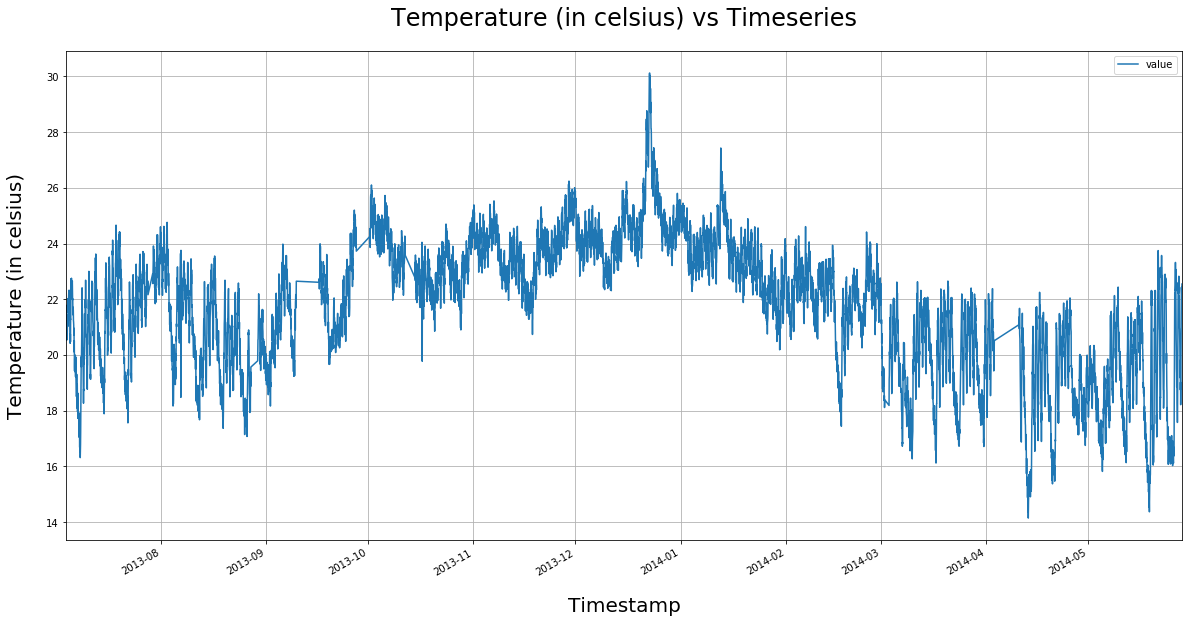

In [14]:
"""------------ DATA PREPROCESSING ------------"""

# Converting fahrenheit values to celsius 
df = df.assign(value = lambda x: (x['value']-32)*(5/9))

# Converting string timestamp data to datatime data
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%f')

# Visualizing time-series data with temperature in celsius
df.plot('timestamp','value', figsize=(20,10))
plt.title('Temperature (in celsius) vs Timeseries', fontsize=24, pad=25)
plt.ylabel('Temperature (in celsius)', fontsize=20, labelpad=20)
plt.xlabel('Timestamp', fontsize=20, labelpad=20)
plt.gcf().autofmt_xdate()
plt.grid()

In [15]:
"""------------ FEATURE ENGINEERING ------------"""

# Converting datetime data into hours and storing it in a new column 'Hour'
df['Hour'] = df['timestamp'].dt.hour

# Classifying datetime data into 'day or night' and storing it in a new column 'Session'
bins=[0,6,22,23]
labels=[0, 1, 0]
df['Session'] = pd.cut(df["Hour"], bins, labels=False, include_lowest=True).map({i: x for i, x in enumerate(labels)})

# Classifying datetime data into day of the week and storing it in a new column 'DayOfWeek'
df['DayOfWeek']  = df['timestamp'].dt.dayofweek

# Classifying datetime data into 'workday and weekend' and storing it in a new column 'WorkOrNot'
df['WeekdayOrNot'] = (df['DayOfWeek'] < 5).astype(int)

In [16]:
"""------------ PREPARING TRAINING AND TESTING DATA ------------"""

# Data preparation - extracting all columns except timestamp 
data = df[['value', 'Hour', 'Session', 'DayOfWeek', 'WeekdayOrNot']]

# Applying min-max normalization
min_max = preprocessing.StandardScaler()
scaled = min_max.fit_transform(data)
data = pd.DataFrame(scaled)

# Splitting the data into training and testing dataset
test_size = int(0.2 * len(df))
pred_time = 1
unroll_len = 50
test_cut = test_size + unroll_len  + 1

#Training data
X_train = data[0:-pred_time-test_cut].values
y_train = data[pred_time:-test_cut][0].values

#Test data
X_test = data[0-test_cut:-pred_time].values
y_test = data[pred_time-test_cut:  ][0].values

# Generating sliding window
def create_sequences(data, step_size):
    """
        Creates sequences of data based on step_size.
        
        Parameters
        ----------
        X: pandasdataframe
            Input of pandas dataframe 
        step_size: int
            Sliding window size for creating sequences
           
        Return
        ----------
        X_out: ndarray
            Output of sequences in numpy array
    """
    
    data_out = []
    for i in range(len(data)-step_size):
        data_out.append(data[i:(i+step_size)])
   
    return np.array(data_out)

X_train = create_sequences(X_train, unroll_len)
y_train = y_train[-X_train.shape[0]:]
X_test  = create_sequences(X_test, unroll_len)
y_test  = y_test[-X_test.shape[0]:]

In [17]:
# Checking the shape of train and test datsets and the respective set of labels
print("Shape of training dataset: {}".format(X_train.shape))
print("Shape of training labels: {}".format(y_train.shape))
print("Shape of test dataset: {}".format(X_test.shape))
print("Shape of test labels: {}".format(y_test.shape))

Shape of training dataset: (5712, 50, 5)
Shape of training labels: (5712,)
Shape of test dataset: (1453, 50, 5)
Shape of test labels: (1453,)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 64)          17920     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 84,021
Trainable params: 84,021
Non-trainable params: 0
_________________________________________________________________


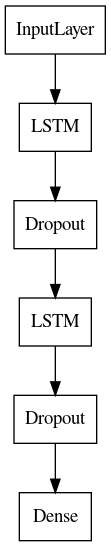

In [18]:
"""------------ BUILDING THE LSTM MODEL ------------"""

from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM

# Building a LSTM neural network model using sequential API.
model = tf.keras.Sequential([
layers.LSTM(64, input_dim=X_train.shape[-1],return_sequences=True),
layers.Dropout(0.2),
layers.LSTM(100, return_sequences=False),
layers.Dropout(0.2),
layers.Dense(1, activation='linear')
])

# Visualizing the model summary
model.summary()

# Visualizing the model structure 
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96,
)

In [ ]:
"""------------ TRAINING THE MODEL ------------"""

# Compiling the model
model.compile(loss='mse', optimizer='rmsprop') 

# Model training and validation
history = model.fit(X_train, y_train, batch_size=3500, epochs=50, validation_split=0.1)

Epoch 1/50
2/2 [==============================] - 4s 977ms/step - loss: 0.7300 - val_loss: 0.4053
Epoch 2/50
2/2 [==============================] - 1s 384ms/step - loss: 0.1636 - val_loss: 0.2169
Epoch 3/50
2/2 [==============================] - 1s 374ms/step - loss: 0.1583 - val_loss: 0.1787
Epoch 4/50
2/2 [==============================] - 1s 372ms/step - loss: 0.1029 - val_loss: 0.1852
Epoch 5/50
2/2 [==============================] - 1s 460ms/step - loss: 0.1234 - val_loss: 0.1553
Epoch 6/50
2/2 [==============================] - 1s 499ms/step - loss: 0.0903 - val_loss: 0.1408
Epoch 7/50
2/2 [==============================] - 1s 435ms/step - loss: 0.0825 - val_loss: 0.1305
Epoch 8/50
2/2 [==============================] - 1s 393ms/step - loss: 0.0816 - val_loss: 0.1290
Epoch 9/50
2/2 [==============================] - 1s 533ms/step - loss: 0.0882 - val_loss: 0.1287


In [ ]:
# Plotting the training and testing loss curves for 50 epochs
plt.figure(figsize = (16, 8))
plt.plot(model.history.history['loss'], label = 'Training Loss')
plt.plot(model.history.history['val_loss'], Label = 'Validation Loss')
plt.title('Training and Testing Loss Curves', fontsize=20, pad=10)
plt.xlabel('Nmber of Epochs', fontsize=16, labelpad=10)
plt.ylabel('Loss', fontsize=16, labelpad=10)
plt.legend()
plt.grid()

In [ ]:
# Storing the differences and ratios between the predicted value and ground truth 
diff = []
ratio = []
pred = model.predict(X_test)
for i in range(len(y_test)):
    pr = pred[i][0]
    ratio.append((y_test[i]/pr)-1)
    diff.append(abs(y_test[i]- pr))

# Plotting the ground truth and the prediction value (for the test data)
plt.figure(figsize = (16, 8))
plt.plot(y_test, color='orange', label='Test Data')
plt.plot(pred, color='magenta', label='Prediction')
plt.title('Prediction vs Ground Truth Values', fontsize=20, pad=10)
plt.ylabel('Values', fontsize=16, labelpad=10)
plt.xlabel('Number of Samples', fontsize=16, labelpad=10)
plt.legend(loc='best')
plt.grid()

# Model evaluation on test data 
eval = model.evaluate(X_test, y_test)
print("Loss for model evaluation on the test data: {}.".format(eval))

In [ ]:
"""------------ FINDING AND VISUALIZING ANOMALIES ------------"""

# Specifying the outliers fraction and converting timestamp to unix time
outliers_fraction = 0.1
df['time_epoch'] = (df['timestamp'].astype(np.int64)/100000000000).astype(np.int64)

diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction*len(diff))
threshold = diff.nlargest(number_of_outliers).min()

# Data in the test set with anomaly label
test = (diff >= threshold).astype(int)

# Setting anomaly = 0, for the training set 
complement = pd.Series(0, index=np.arange(len(data)-test_size))

# Appending anomalies for the test set
df['anomaly'] = complement.append(test, ignore_index='True')

# Printing the number of anomalies detected in the test set
print(("Number of anomalies detected in the test set is equal to {}.".format(df['anomaly'].value_counts()[1])))

# Visualizing anomalies (red dots) in the test data
plt.figure(figsize=(16,8))
a = df.loc[df['anomaly'] == 1, ['time_epoch', 'value']]
plt.plot(df['time_epoch'], df['value'], color='orange')
plt.scatter(a['time_epoch'],a['value'], color='red', label = 'Anomaly')
plt.title('Visualizing Anomalies In The Test Data', fontsize=20, pad=10)
plt.ylabel('Temperature (in celsius)', fontsize=16, labelpad=16)
plt.xlabel('Time Epoch', fontsize=16, labelpad=16)
plt.legend()
plt.grid()